In [13]:
# IMPORTS
from manufacturing_company.src.common.const import *
from manufacturing_company.src.data.import_data import *
from manufacturing_company.src.features.data_cleaning import *

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# IMPORT DATA

In [3]:
communication = load_communication()
communication.head()

,Sender,Recipient,EventDate
0,17,37,2010-01-02 17:40:10
1,17,136,2010-01-02 17:40:10
2,17,62,2010-01-02 17:40:10
3,17,129,2010-01-02 17:40:10
4,17,32,2010-01-02 17:40:10


In [4]:
reportsto = load_reportsto()
reportsto.head()

,ID,ReportsToID
0,1,152
1,2,132
2,3,152
3,4,technical email account - not used by employees
4,5,36


In [52]:
communication.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82677 entries, 0 to 82926
Data columns (total 3 columns):
Sender       82677 non-null int64
Recipient    82677 non-null int64
EventDate    82677 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.5 MB


In [53]:
reportsto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 166
Data columns (total 2 columns):
ID             153 non-null int64
ReportsToID    153 non-null int64
dtypes: int64(2)
memory usage: 3.6 KB


In [30]:
reportsto[~reportsto[REPORTS_TO_ID].str.isnumeric()]

,ID,ReportsToID
3,4,technical email account - not used by employees
9,10,technical email account - not used by employees
20,21,technical email account - not used by employees
22,23,technical email account - not used by employees
23,24,technical email account - not used by employees
25,26,technical email account - not used by employees
45,46,technical email account - not used by employees
50,51,former employee account
74,75,former employee account
86,87,former employee account


In [48]:
communication, reportsto = remove_former_employee_and_technical_accounts(communication, reportsto)

/Users/mateusz/Documents/PyCharmProjects/organizational-structure-detection/manufacturing_company/src/features/data_cleaning.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  reportsto_processed[REPORTS_TO_ID] = pd.to_numeric(reportsto_processed[REPORTS_TO_ID])


In [51]:
communication[communication[SENDER] == communication[RECIPIENT]]

,Sender,Recipient,EventDate


In [50]:
communication, reportsto = remove_messges_sent_to_yourself(communication, reportsto)

In [56]:
communication[EVENT_DATE].value_counts().head()

2010-01-08 14:22:58    131
2010-01-13 09:51:43    131
2010-01-21 08:21:17    130
2010-01-29 15:20:38    128
2010-03-19 08:57:55    125
Name: EventDate, dtype: int64

In [66]:
len(communication[communication[EVENT_DATE] == '2010-03-19 08:57:55'][SENDER].unique())

1

In [4]:
df = pd.read_csv('manufacturing_company/data/intermediate/02_drop_duplicates/communication.csv', sep=';')

In [10]:
df.head()

,Sender,Recipient,EventDate
0,17,37,2010-01-02 17:40:10
1,17,136,2010-01-02 17:40:10
2,17,62,2010-01-02 17:40:10
3,17,129,2010-01-02 17:40:10
4,17,32,2010-01-02 17:40:10


In [8]:
df[EVENT_DATE] = df[EVENT_DATE].astype("datetime64")

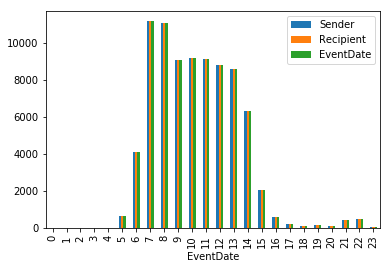

In [14]:
df.groupby(df[EVENT_DATE].dt.hour).count().plot(kind="bar")
plt.show()